In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
df = pd.read_csv('C:/Users/HP/Downloads/data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
pwd

'C:\\Users\\HP'

In [10]:
df.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [11]:
df.shape

(10000, 14)

In [13]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

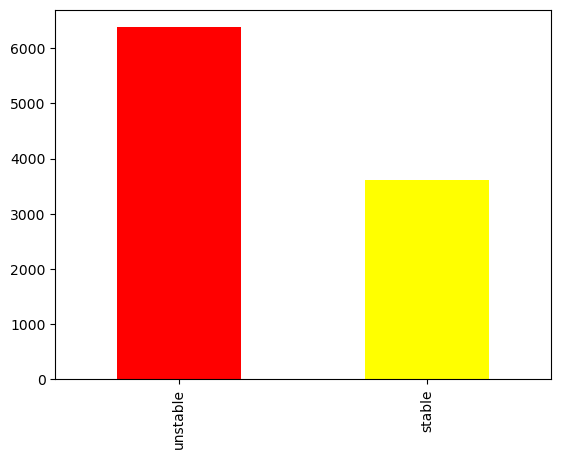

In [15]:
df['stabf'].value_counts().plot(kind='bar', color=['red', 'yellow']);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [17]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [19]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [20]:
df.tau1.value_counts()

2.959060    1
4.928147    1
8.942266    1
9.739026    1
5.593826    1
           ..
3.197134    1
5.280618    1
8.089295    1
6.445718    1
6.530527    1
Name: tau1, Length: 10000, dtype: int64

In [21]:
pd.crosstab(df.stabf, df.tau1)

tau1,0.500793,0.501331,0.502321,0.503284,0.504014,0.504960,0.506419,0.506736,0.508533,0.509124,...,9.991046,9.991798,9.993046,9.993961,9.994356,9.995375,9.996678,9.997738,9.998995,9.999469
stabf,,,,,,,,,,,,,,,,,,,,,
stable,1,0,1,1,1,1,1,1,0,1,...,0,1,1,0,1,1,0,0,0,0
unstable,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,1,1


In [24]:
df.p1.value_counts()

3.763085    1
4.770650    1
4.247526    1
3.870693    1
2.843263    1
           ..
3.210640    1
4.910284    1
3.930490    1
3.984816    1
3.492807    1
Name: p1, Length: 10000, dtype: int64

In [25]:
pd.crosstab(df.stabf, df.p1)

p1,1.582590,1.642860,1.675633,1.680221,1.687356,1.695576,1.718919,1.722837,1.764911,1.785256,...,5.732533,5.733205,5.750334,5.752706,5.784142,5.798273,5.814129,5.818705,5.827285,5.864418
stabf,,,,,,,,,,,,,,,,,,,,,
stable,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,1,1,0,0,0,0
unstable,1,0,1,1,0,1,0,1,1,1,...,1,0,0,1,0,0,1,1,1,1


In [30]:
corr_mat = df.corr()
corr_mat

C:\Users\HP\AppData\Local\Temp\ipykernel_9780\2851270020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


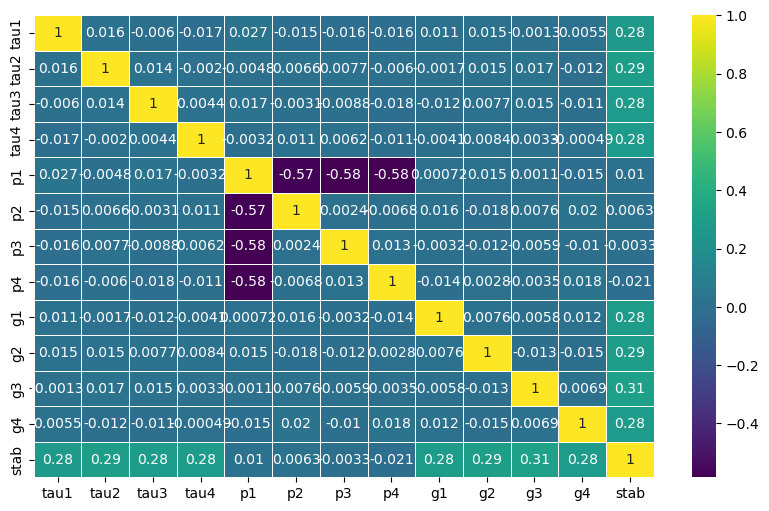

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat, linewidths=0.5, annot=True, cmap='viridis');

In [33]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [35]:
x = df.drop('stabf', axis = 1)
y = df['stabf']

In [36]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [38]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8985, 'KNN': 0.7895, 'Random Forest': 0.9995}

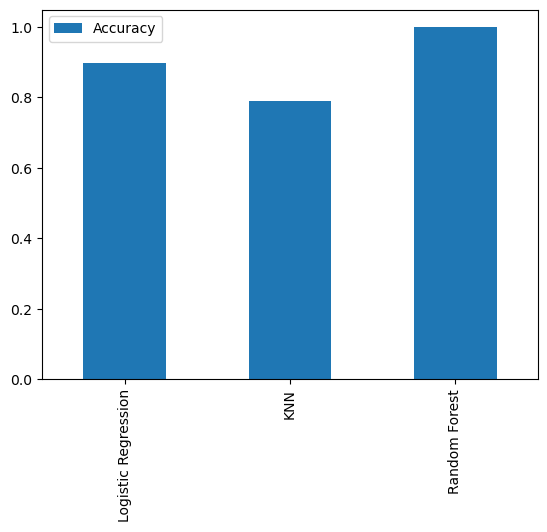

In [40]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

In [43]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [44]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [46]:
rs_log_reg.score(x_test, y_test)

0.997

In [49]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=30,
                          verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [51]:
rs_rf.score(x_test, y_test)

0.9995

In [52]:
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
gs_log_reg.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

In [54]:
gs_log_reg.score(x_test, y_test)

0.997

In [55]:
y_preds = gs_log_reg.predict(x_test)

In [56]:
y_preds

array(['unstable', 'unstable', 'unstable', ..., 'unstable', 'unstable',
       'unstable'], dtype=object)

In [57]:
y_test

6252    unstable
4684    unstable
1731    unstable
4742      stable
4521      stable
          ...   
6412    unstable
8285    unstable
7853    unstable
1095    unstable
6929    unstable
Name: stabf, Length: 2000, dtype: object

In [58]:
print(confusion_matrix(y_test, y_preds))

[[ 692    1]
 [   5 1302]]


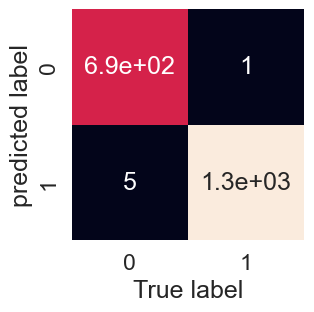

In [59]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')
    
plot_conf_mat(y_test, y_preds)

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      stable       0.99      1.00      1.00       693
    unstable       1.00      1.00      1.00      1307

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [61]:
gs_log_reg.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

In [63]:
clf = LogisticRegression(C=1000.0,
                        solver='liblinear')

In [64]:
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.9968

In [65]:
cv_precision = cross_val_score(clf, x, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1954, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\HP\anaconda3\lib\site-packages\sk

nan

In [66]:
cv_recall = cross_val_score(clf, x, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklea

nan

In [67]:
cv_f1 = cross_val_score(clf, x, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1573, in precision_recall_fscore_support
  

nan

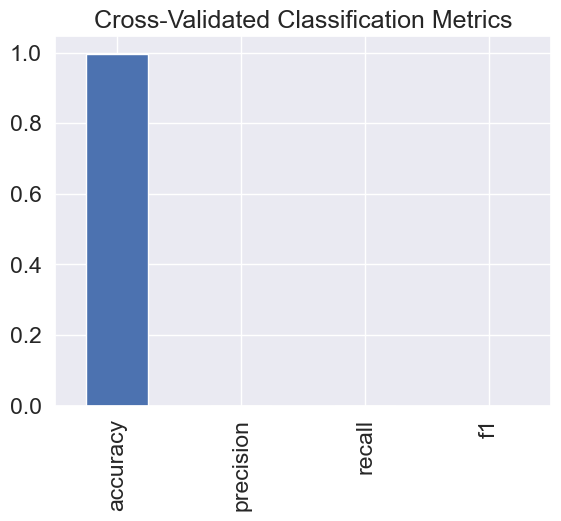

In [69]:
cv_metrics = pd.DataFrame({'accuracy': cv_acc,
                         'precision': cv_precision,
                         'recall': cv_recall,
                         'f1': cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                     legend=False);

In [70]:
clf

LogisticRegression(C=1000.0, solver='liblinear')

In [71]:
clf.fit(x_train, y_train);

In [72]:
clf.coef_

array([[ 1.71488202e-02,  1.38853984e-03,  1.71829017e-02,
         8.99095660e-03,  1.01017846e-01, -5.76708932e-02,
        -9.67024423e-03, -3.36763650e-02, -4.25716427e-02,
         1.96383786e-01,  1.32153383e-01,  1.57568891e-01,
         4.41739592e+02]])

In [73]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'tau1': 0.01714882020816149,
 'tau2': 0.001388539841116013,
 'tau3': 0.017182901702585594,
 'tau4': 0.008990956597045623,
 'p1': 0.10101784565282462,
 'p2': -0.0576708931930603,
 'p3': -0.00967024422776907,
 'p4': -0.03367636504130189,
 'g1': -0.042571642743870194,
 'g2': 0.19638378594989703,
 'g3': 0.1321533831451963,
 'g4': 0.15756889127933296,
 'stab': 441.7395919405152}

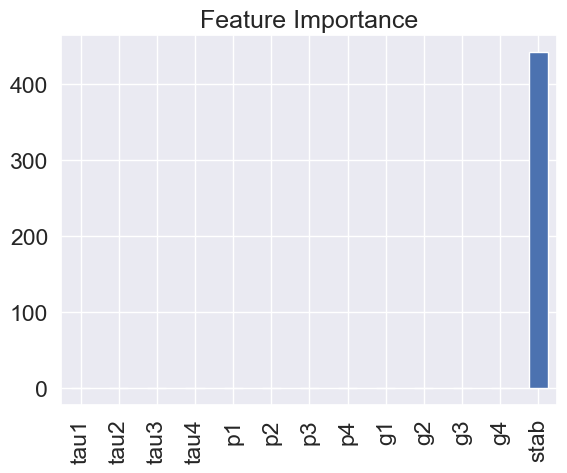

In [75]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [76]:
pd.crosstab(df["p4"], df["g4"])

g4,0.050028,0.050170,0.050231,0.050336,0.050458,0.050546,0.050633,0.050731,0.050795,0.050923,...,0.999079,0.999185,0.999328,0.999409,0.999455,0.999576,0.999640,0.999739,0.999882,0.999930
p4,,,,,,,,,,,,,,,,,,,,,
-1.999926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.999787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.999675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.999449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.999336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.500692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.500592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0.500426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
pd.crosstab(df["p4"], df["stabf"])

stabf,stable,unstable
p4,,
-1.999926,0,1
-1.999787,1,0
-1.999675,0,1
-1.999449,1,0
-1.999336,0,1
...,...,...
-0.500692,1,0
-0.500592,0,1
-0.500426,0,1


In [78]:
pd.crosstab(df["g4"], df["stabf"])

stabf,stable,unstable
g4,,
0.050028,1,0
0.050170,1,0
0.050231,0,1
0.050336,0,1
0.050458,1,0
...,...,...
0.999576,0,1
0.999640,1,0
0.999739,0,1


In [79]:
pd.crosstab(df["tau4"], df["stabf"])

stabf,stable,unstable
tau4,,
0.500473,1,0
0.501571,1,0
0.502025,1,0
0.502879,1,0
0.504016,1,0
...,...,...
9.995380,0,1
9.996315,0,1
9.997448,1,0


In [81]:
pd.crosstab(df.tau1, df.stab)

stab,-0.080760,-0.074923,-0.070529,-0.070484,-0.069501,-0.068709,-0.068062,-0.067494,-0.066557,-0.066401,...,0.105702,0.106122,0.106451,0.106803,0.106962,0.107060,0.107272,0.107380,0.108971,0.109403
tau1,,,,,,,,,,,,,,,,,,,,,
0.500793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.501331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.502321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.503284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.504014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.995375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.996678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.997738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
pd.crosstab(df.tau1, df.stabf)

stabf,stable,unstable
tau1,,
0.500793,1,0
0.501331,0,1
0.502321,1,0
0.503284,1,0
0.504014,1,0
...,...,...
9.995375,1,0
9.996678,0,1
9.997738,0,1
